In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
from pymc3.gp.util import plot_gp_dist
import scipy as sp
import pyccl as ccl
import theano
import theano.tensor as tt
import os
import utils
from make_data import MakeData
from scipy.linalg import block_diag
theano.config.exception_verbosity='high'
%matplotlib inline

# Settings

In [6]:
z_max = 1100
res = 200
x_arr = np.linspace(0, np.log(1+z_max), res)
dx = np.mean(np.diff(x_arr))
z_arr = np.exp(x_arr)-1
a_arr = 1./(1+z_arr)

path = '/home/jaimerz/PhD/Growz/data/products/'

mean_mode = 'Planck'
challenge = None

data_class = MakeData(z_max, res , path)
Planck = data_class.Planck
z_planck = data_class.z_planck
c = data_class.c

DESI = data_class.get_DESI(new=False, mode=None)
H_DESI = data_class.get_DESI(new=False, mode='H')
dA_DESI = data_class.get_DESI(new=False, mode='dA')
fs8_DESI = data_class.get_DESI(new=False, mode='fs8')
WFIRST = data_class.get_WFIRST(new=False)
CC = data_class.get_CC(new=False)
DSS = data_class.get_DSS(new=False)
BOSS = data_class.get_BOSS(new=False)
eBOSS = data_class.get_eBOSS(new=False)
Wigglez = data_class.get_Wigglez(new=False)
DS17 = data_class.get_DS17(new=False)
CMB = data_class.get_CMB(new=False)
FCMB = data_class.get_FCMB(new=False)

Found file for DESI
Found file for HDESI
Found file for dADESI
Found file for fs8DESI
Found file for WFIRST
Found file for CC
Found file for DSS
Found file for BOSS
Found file for eBOSS
Found file for Wigglez
Found file for DS17
Found file for CMB
Found file for FCMB


In [7]:
n_samples = 125
n_tune = 125
datadict = {'DESI': DESI,
            'H_DESI': H_DESI,
            'dA_DESI': dA_DESI,
            'fs8_DESI': fs8_DESI,
            'WFIRST': WFIRST,
            'CC': CC,
            'DS17': DS17, 
            'BOSS': BOSS,
            'eBOSS': eBOSS,
            'Wigglez': Wigglez,
            'DSS': DSS, #}#,
            'CMB': CMB, 
            'FCMB': FCMB}

data_comb = 'DESI_CMB' # All, All_CMB, SDSS, SDSS_CMB, Add, Add_CMB
data_combs = {'All': ['CC', 'DS17', 'BOSS', 'eBOSS', 'Wigglez', 'DSS'],
             'All_CMB': ['CC', 'DS17', 'BOSS', 'eBOSS', 'Wigglez', 'DSS', 'CMB'],
             'All_FCMB': ['CC', 'DS17', 'BOSS', 'eBOSS', 'Wigglez', 'DSS', 'FCMB'],
             'SDSS': ['BOSS', 'eBOSS'],
             'SDSS_CMB': ['BOSS', 'eBOSS', 'CMB'],
             'Add': ['CC', 'DS17', 'Wigglez', 'DSS'],
             'Add_CMB': ['CC', 'DS17', 'Wigglez', 'DSS', 'CMB'],
             'DESI_CMB': ['DESI', 'CMB'],
             'DESI': ['DESI'], 
             'CC': ['CC']}

datasets = data_combs[data_comb]

need_dM = ['DESI', 'dA_DESI', 'BOSS', 'eBOSS', 'Wigglez', 'DS17', 'CMB', 'FCMB']
need_fs8 = ['DESI', 'fs8_DESI', 'BOSS', 'eBOSS', 'Wigglez', 'DSS']
need_rd = ['BOSS', 'eBOSS', 'CMB']

if any(dataset in datasets for dataset in need_dM):
    get_dM=True 
else:
    get_dM=False
    
if any(dataset in datasets for dataset in need_fs8):
    get_fs8=True
else:
    get_fs8=False
    
if any(dataset in datasets for dataset in need_rd):
    get_rd = True
else:
    get_rd = False

# Plotting

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_data.pdf'

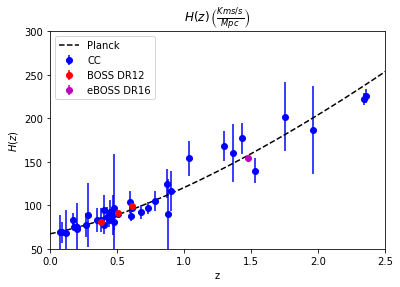

In [8]:
plt.plot(z_planck, Planck['Hkms_arr'], "k--", label='Planck')
plt.errorbar(CC['z'], CC['data'], yerr = CC['err'], fmt='bo', label='CC')
#plt.errorbar(FCMB['z'], FCMB['data'], yerr = FCMB['err'], fmt='go', label='FCMB')
plt.errorbar(BOSS['z'], BOSS['para_data'], yerr=BOSS['para_err'], fmt='ro', label='BOSS DR12')
plt.errorbar(eBOSS['z'], c/1000/(eBOSS['para_data']*eBOSS['rd']), yerr = 1/eBOSS['rd']/(np.array([0.47])), fmt='mo', label='eBOSS DR16')


# axis labels and title
plt.xlim(0, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();
os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_data.pdf')  

In [ ]:
plt.plot(z_planck, Planck['Hkms_arr'], "k--", label='Planck')
plt.errorbar(H_DESI['z'], H_DESI['data'], yerr = H_DESI['err'], fmt='bo', label='DESI')


# axis labels and title
plt.xlim(-0.1, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();


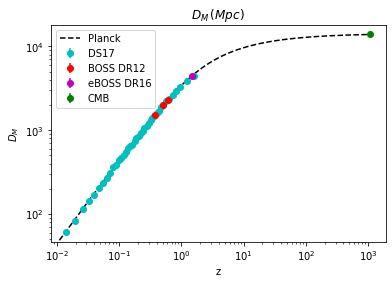

In [9]:
plt.plot(z_planck, Planck['dM_arr'], "k--", label='Planck')
plt.errorbar(DS17['z'], (10**((DS17['data']-25+19.4)/5))/(1+DS17['z']),
             yerr=(10**(DS17['err']/5))/(1+DS17['z']), fmt='co', label='DS17')
plt.errorbar(BOSS['z'], BOSS['perp_data'], yerr=BOSS['perp_err'], fmt='ro', label='BOSS DR12')
plt.errorbar(eBOSS['z'], eBOSS['perp_data']*eBOSS['rd'], yerr=np.array([0.79])*eBOSS['rd'], fmt='mo', label='eBOSS DR16')
plt.errorbar(CMB['z'], (1/CMB['data'])*(100*CMB['rd']), yerr=(1/CMB['err'])*1/(100*CMB['rd']), fmt='go', label='CMB')

# axis labels and title
#plt.xlim(-0.1, 2.5)
#plt.ylim(0, 5000)
plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.xscale("log")
plt.yscale('log')
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

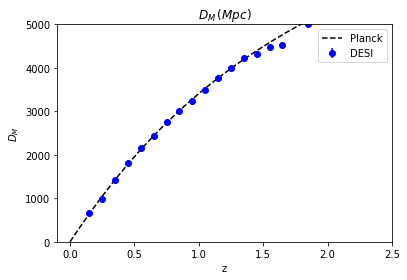

In [10]:
plt.plot(z_planck, Planck['dM_arr'], "k--", label='Planck')
plt.errorbar(DESI['z'], (1+DESI['z'])*dA_DESI['data'], yerr=dA_DESI['err'], fmt='bo', label='DESI')

# axis labels and title
plt.xlim(-0.1, 2.5)
plt.ylim(0, 5000)
plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_data.pdf'

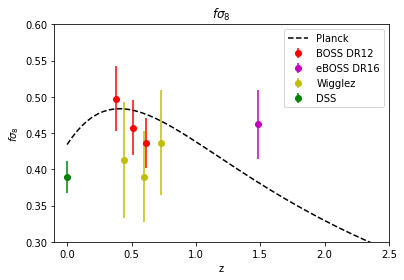

In [11]:
plt.plot(z_planck, Planck['f_arr']*Planck['s8_arr'], "k--", label='Planck')
plt.errorbar(BOSS['z'], BOSS['fs8_data'], yerr=BOSS['fs8_err'], fmt='ro', label='BOSS DR12')
plt.errorbar(eBOSS['z'], eBOSS['fs8_data'], yerr=eBOSS['fs8_err'], fmt='mo', label='eBOSS DR16')
plt.errorbar(Wigglez['z'], Wigglez['data'], yerr=Wigglez['err'], fmt='yo', label='Wigglez')
plt.errorbar(DSS['z'], DSS['data'], yerr=DSS['err'], fmt='go', label='DSS')


# axis labels and title
plt.xlim(-0.1, 2.5)
plt.ylim(0.3, 0.6)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_data.pdf')  

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_forecast.pdf'

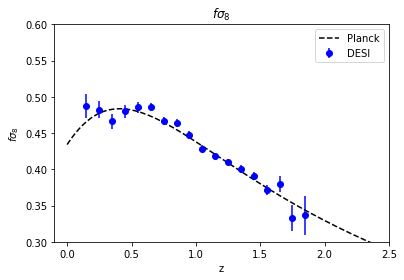

In [12]:
plt.plot(z_planck, Planck['f_arr']*Planck['s8_arr'], "k--", label='Planck')
plt.errorbar(DESI['z'], fs8_DESI['data'], yerr=fs8_DESI['err'], fmt='bo', label='DESI')

# axis labels and title
plt.xlim(-0.1, 2.5)
plt.ylim(0.3, 0.6)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();
os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_forecast.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_forecast.pdf')  

In [ ]:
data = np.array([])
data_cov = np.array([])
for dataset_name in datasets:
    dataset = datadict[dataset_name]
    data = np.concatenate([data, dataset['data']])
    data_cov = block_diag(data_cov, dataset['cov'])
data_cov = data_cov[1:]

# Model

In [ ]:
with pm.Model() as model:
    ℓ = pm.Uniform("ℓ", 0.001, 7) 
    η = pm.HalfNormal("η", sigma=0.5) 
    A0 = 1 #pm.Uniform("A0", 0.8, 1.2)
    wm0_mean = data_class.wm0 
    wr0 = data_class.wr0
    wL0 = data_class.wL0 
    gp_cov = η ** 2 * pm.gp.cov.ExpQuad(1, ℓ) + pm.gp.cov.WhiteNoise(1e-3)
    gp = pm.gp.Latent(cov_func=gp_cov)
    
    #Mean of the gp
    H = pm.Deterministic('H', 100*tt.sqrt(wm0_mean*(1+z_arr)**3+wr0*(1+z_arr)**4+wL0))
    
    #Set up Gaussian process
    DH_gp = gp.prior("DH_gp", X=x_arr[:, None]) 
    H_gp = pm.Deterministic("H_gp", tt.as_tensor_variable(A0*H*(1+DH_gp)))
    H0_gp = pm.Deterministic("H0_gp", tt.as_tensor_variable(H_gp[0]))
    
    if get_dM:
        dH_gp = pm.Deterministic("dH", tt.as_tensor_variable((c/1000)/H_gp))
        dM_rec_gp = tt.zeros(len(z_arr)+1)
        dM_rec_gp = tt.inc_subtensor(dM_rec_gp[1:],
                  tt.as_tensor_variable(dx*tt.cumsum(dH_gp*(1+z_arr))))
        dM_trap_gp = tt.as_tensor_variable(0.5*(dM_rec_gp[1:]+dM_rec_gp[:-1])-0.5*dM_rec_gp[1])
        dM_gp = pm.Deterministic('dM_gp', dM_trap_gp)
        #dM_gp = pm.Deterministic('dM_gp', dM_rec_gp[:-1])
        dA_gp = pm.Deterministic('dA_gp', dM_gp/(1+z_arr))
        dL_gp = pm.Deterministic('dL_gp', dM_gp*(1+z_arr))
        
    if get_rd:
        rd_gp = pm.Normal("rd_gp", 150, 5) 
        
    if get_fs8:
        Wm0 = pm.Uniform("Wm0", 0., 1.)
        s80 = pm.Normal("s80", 0.8, 0.5)
        E = H_gp/H_gp[0]
        xx = x_arr[::-1]
        ee = E[::-1]
        aa = np.exp(-xx)
        dx = np.mean(np.diff(xx))

        nz = len(aa)
        dd = tt.zeros(nz)
        yy = tt.zeros(nz)
        dd = tt.inc_subtensor(dd[0], aa[0])
        yy = tt.inc_subtensor(yy[0], aa[0]**3*E[0])

        for i in range(nz-1):
            A0 = -1.5*Wm0/(aa[i]*ee[i])
            B0 = -1./(aa[i]**2*ee[i])
            A1 = -1.5*Wm0/(aa[i+1]*ee[i+1])
            B1 = -1./(aa[i+1]**2*ee[i+1])
            yy = tt.inc_subtensor(yy[i+1], (1+0.5*dx**2*A0*B0)*yy[i]+0.5*(A0+A1)*dx*dd[i])
            dd = tt.inc_subtensor(dd[i+1],0.5*(B0+B1)*dx*yy[i]+(1+0.5*dx**2*A0*B0)*dd[i])
        
        y = tt.as_tensor_variable(yy[::-1])
        d = tt.as_tensor_variable(dd[::-1])
        
        fs8_gp = pm.Deterministic('fs8_gp', s80*y/(a_arr**2*E*d[0]))
        s8_gp = pm.Deterministic('s8_gp', s80*d/d[0])
        
    theory = tt.as_tensor_variable([])
    
#Modules
if 'DESI' in datasets:
    print('Adding DESI')
    with model:
        DESI_H = pm.Deterministic('DESI_H',
                 tt.as_tensor_variable(H_gp[DESI['idx']]+(H_gp[DESI['idx']+1]-H_gp[DESI['idx']])*DESI['U']))
        DESI_dA = pm.Deterministic('DESI_dA',
                  tt.as_tensor_variable(dA_gp[DESI['idx']]+(dA_gp[DESI['idx']+1]-dA_gp[DESI['idx']])*DESI['U']))
        DESI_fs8 = pm.Deterministic('DESI_fs8',
                   tt.as_tensor_variable(fs8_gp[DESI['idx']]+(fs8_gp[DESI['idx']+1]-fs8_gp[DESI['idx']])*DESI['U']))
        theory = tt.concatenate([theory, DESI_H, DESI_dA, DESI_fs8])

if 'gro_DESI' in datasets:
    print('Adding DESI_gro')
    with model:
        DESI_fs8 = pm.Deterministic('DESI_fs8',
                   tt.as_tensor_variable(fs8_gp[DESI['idx']]+(fs8_gp[DESI['idx']+1]-fs8_gp[DESI['idx']])*DESI['U']))
        theory = tt.concatenate([theory, DESI_fs8])

if 'geo_DESI' in datasets:
    print('Adding DESI_geo')
    with model:
        DESI_H = pm.Deterministic('DESI_H',
                 tt.as_tensor_variable(H_gp[DESI['idx']]+(H_gp[DESI['idx']+1]-H_gp[DESI['idx']])*DESI['U']))
        DESI_dA = pm.Deterministic('DESI_dA',
                  tt.as_tensor_variable(dA_gp[DESI['idx']]+(dA_gp[DESI['idx']+1]-dA_gp[DESI['idx']])*DESI['U']))
        theory = tt.concatenate([theory, DESI_H, DESI_dA])
        
if 'WFIRST' in datasets:
    print('Adding WFIRST')
    with model:
        WFIRST_E = pm.Deterministic('WFIRST_E',
                   tt.as_tensor_variable(E_gp[WFIRST['idx']]+(E_gp[WFIRST['idx']+1]-E_gp[WFIRST['idx']])*WFIRST['U']))
        theory = tt.concatenate([theory, WFIRST_E])

if 'CC' in datasets:
    print('Adding CCs')
    with model:
        CC_H = pm.Deterministic("CC_H",
               tt.as_tensor_variable(H_gp[CC['idx']]+(H_gp[CC['idx']+1]-H_gp[CC['idx']])*CC['U']))
        theory = tt.concatenate([theory, CC_H])
        
if 'DS17' in datasets:
    print('Adding Pantheon')
    with model:
        M = pm.Normal('M', mu=-19.0, sigma=3)
        DS17_dL = tt.as_tensor_variable(dL_gp[DS17['idx']]+(dL_gp[DS17['idx']+1]-dL_gp[DS17['idx']])*DS17['U'])
        DS17_u = pm.Deterministic("DS17_dL",
                 tt.as_tensor_variable(5*tt.log10(DS17_dL)+25+M))
        theory = tt.concatenate([theory, DS17_u])
        
if 'BOSS' in datasets:
    print('Adding BOSS')
    with model:
        B_H = tt.as_tensor_variable(H_gp[BOSS['idx']]+(H_gp[BOSS['idx']+1]-H_gp[BOSS['idx']])*BOSS['U'])
        B_dM = tt.as_tensor_variable(dM_gp[BOSS['idx']]+(dM_gp[BOSS['idx']+1]-dM_gp[BOSS['idx']])*BOSS['U'])
        B_fs8 = pm.Deterministic("B_fs8", 
                   tt.as_tensor_variable(fs8_gp[BOSS['idx']]+(fs8_gp[BOSS['idx']+1]-fs8_gp[BOSS['idx']])*BOSS['U']))
        #Get alpha_perp and alpha_para 
        B_para = pm.Deterministic("B_para", B_H*rd_gp/BOSS['rd'])
        B_perp = pm.Deterministic("B_perp", B_dM*BOSS['rd']/rd_gp)
        theory = tt.concatenate([theory, B_para, B_perp, B_fs8])
        
if 'geo_BOSS' in datasets:
    print('Adding geo_BOSS')
    with model:
        B_H = tt.as_tensor_variable(H_gp[BOSS['idx']]+(H_gp[BOSS['idx']+1]-H_gp[BOSS['idx']])*BOSS['U'])
        B_dM = tt.as_tensor_variable(dM_gp[BOSS['idx']]+(dM_gp[BOSS['idx']+1]-dM_gp[BOSS['idx']])*BOSS['U'])
        #Get alpha_perp and alpha_para 
        B_para = pm.Deterministic("B_para", B_H*rd_gp/BOSS['rd'])
        B_perp = pm.Deterministic("B_perp", B_dM*BOSS['rd']/rd_gp)
        theory = tt.concatenate([theory, B_para, B_perp])
        
if 'gro_BOSS' in datasets:
    print('Adding gro_BOSS')
    with model:
        B_fs8 = pm.Deterministic("B_fs8", 
                   tt.as_tensor_variable(fs8_gp[BOSS['idx']]+(fs8_gp[BOSS['idx']+1]-fs8_gp[BOSS['idx']])*BOSS['U']))
        theory = tt.concatenate([theory, B_fs8])
        
if 'eBOSS' in datasets:
    print('Adding eBOSS')
    with model:
        eB_dH = tt.as_tensor_variable(dH_gp[eBOSS['idx']]+(dH_gp[eBOSS['idx']+1]-dH_gp[eBOSS['idx']])*eBOSS['U'])
        eB_dM = tt.as_tensor_variable(dM_gp[eBOSS['idx']]+(dM_gp[eBOSS['idx']+1]-dM_gp[eBOSS['idx']])*eBOSS['U'])
        eB_fs8 = pm.Deterministic("eB_fs8", 
                   tt.as_tensor_variable(fs8_gp[eBOSS['idx']]+(fs8_gp[eBOSS['idx']+1]-fs8_gp[eBOSS['idx']])*eBOSS['U']))
        eB_para = pm.Deterministic("eB_para", eB_dH/rd_gp)
        eB_perp = pm.Deterministic("eB_perp", eB_dM/rd_gp)
        theory = tt.concatenate([theory, eB_para, eB_perp, eB_fs8])
        
if 'geo_eBOSS' in datasets:
    print('Adding geo_eBOSS')
    with model:
        eB_dH = tt.as_tensor_variable(dH_gp[eBOSS['idx']]+(dH_gp[eBOSS['idx']+1]-dH_gp[eBOSS['idx']])*eBOSS['U'])
        eB_dM = tt.as_tensor_variable(dM_gp[eBOSS['idx']]+(dM_gp[eBOSS['idx']+1]-dM_gp[eBOSS['idx']])*eBOSS['U'])
        eB_para = pm.Deterministic("eB_para", eB_dH/rd_gp)
        eB_perp = pm.Deterministic("eB_perp", eB_dM/rd_gp)
        theory = tt.concatenate([theory, eB_para, eB_perp])

if 'gro_eBOSS' in datasets:
    print('Adding gro_eBOSS')
    with model:
        eB_fs8 = pm.Deterministic("eB_fs8", 
                   tt.as_tensor_variable(fs8_gp[eBOSS['idx']]+(fs8_gp[eBOSS['idx']+1]-fs8_gp[eBOSS['idx']])*eBOSS['U']))
        theory = tt.concatenate([theory, eB_fs8])

if 'Wigglez' in datasets:
    print('Adding Wigglez')
    with model:
        Wigglez_fs8 = pm.Deterministic("Wigglez_fs8",
                    tt.as_tensor_variable(fs8_gp[Wigglez['idx']]+(fs8_gp[Wigglez['idx']+1]-fs8_gp[Wigglez['idx']])*Wigglez['U']))
        theory = tt.concatenate([theory, Wigglez_fs8])

if 'DSS' in datasets:
    print('Adding DSS')
    with model:
        DSS_fs8 = pm.Deterministic("fs8_eBOSS", tt.as_tensor_variable(fs8_gp[DSS['idx']]))
        theory = tt.concatenate([theory, DSS_fs8])

if 'CMB' in datasets:
    print('Adding CMB')
    with model:
        dM_star = tt.as_tensor_variable(dM_gp[CMB['idx']]+(dM_gp[CMB['idx']+1]-dM_gp[CMB['idx']])*CMB['U'])
        t100 = pm.Deterministic('t100', 100*rd_gp/dM_star) 
        theory = tt.concatenate([theory, t100])

In [ ]:
#Sampling
with model:
    lkl= pm.MvNormal("lkl", mu=theory, cov=data_cov, observed=data)
    trace = pm.sample(n_samples, return_inferencedata=True, tune=n_tune, target_accept=0.95)

In [ ]:
#print r-stat
print(pm.summary(trace)['r_hat'][["Wm0", "η"]])
print(pm.summary(trace)['mean'][["Wm0", "ℓ", "η"]])

In [ ]:
#Save
filename = data_comb
if mean_mode is not None:
    filename += '_'+mean_mode
if challenge is not None:
    filename += '_'+challenge
    
filename += '_A0_{}_{}'.format(n_samples, n_tune)
print(filename)

n = np.array(trace.posterior["η"]).flatten()
l = np.array(trace.posterior["ℓ"]).flatten()
A0 = None #np.array(trace.posterior["A0"]).flatten()
DHz = np.array(trace.posterior["DH_gp"])
DHz = DHz.reshape(-1, DHz.shape[-1])
Hz =np.array(trace.posterior["H_gp"])
Hz = Hz.reshape(-1, Hz.shape[-1])
H0_gp = np.array(trace.posterior["H0_gp"]).flatten()

if get_dM:
    dMz = np.array(trace.posterior["dM_gp"])
    dMz = dMz.reshape(-1, dMz.shape[-1])
else:
    dMz = None

if get_rd:
    rd = np.array(trace.posterior["rd_gp"]).flatten()
    omega_b = np.array(trace.posterior["wb0"]).flatten()
else:
    omega_b = None
    rd = None
    
if get_fs8:
    s8z = np.array(trace.posterior["s8_gp"])
    s8z = s8z.reshape(-1, s8z.shape[-1])
    fs8z = np.array(trace.posterior["fs8_gp"])
    fs8z = fs8z.reshape(-1, fs8z.shape[-1])
    Omega_m = np.array(trace.posterior["Wm0"]).flatten()
    s80 = np.array(trace.posterior["s80"]).flatten()
    S80 = s80*np.sqrt(Omega_m/0.3)
else: 
    s8z = None 
    fs8z = None
    Omega_m = None
    s80 = None
    S80 = None

if 'DS17' in datasets:
    M = np.array(trace.posterior["M"]).flatten()
else:
    M = None


os.mkdir(filename)
np.savez(os.path.join(filename,'samples.npz'), 
         z_arr = z_arr,
         n=n,
         l=l,
         A0=A0,
         DHz = DHz,
         Hz=Hz,
         dMz=dMz,
         s8z=s8z,
         fs8z=fs8z,
         H0_gp=H0_gp,
         Omega_m=Omega_m,
         omega_b=omega_b,
         rd=rd,
         M=M,
         s80=s80,
         S80=S80)

In [ ]:
def get_m_s(rows):
    cols = np.transpose(rows)
    means = np.array([])
    sigmas = np.array([])
    for col in cols:
        mean = np.mean(col)
        sigma = np.std(col)
        means = np.append(means, mean)
        sigmas = np.append(sigmas, sigma)
    return means, sigmas

In [ ]:
DHz = np.array(trace.posterior["DH_gp"])
DHz = DHz.reshape(-1, DHz.shape[-1])
DH_m, DH_s = get_m_s(DHz)

In [ ]:
plt.plot(z_arr,  DH_m, color ='b')
plt.fill_between(z_arr, DH_m+DH_s,
                 DH_m-DH_s, color='b', alpha=.5)
plt.xscale('log')
plt.xlim(0, 1110)
plt.title('$\delta$H(z)')
plt.show()

In [ ]:
# plot the results
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

plot_gp_dist(ax, trace.posterior["H_gp"][0, :, :], z_arr[:, None])
plt.plot(z_arr, data_class.H_arr, 'b-.', label='formula')

# plot the data and the true latent function
#ax.plot(z_arr_f[:, None], H_arr_f, "dodgerblue", lw=3, label=r'$LCDM$')
if 'CC' in datasets:
    plt.errorbar(CC['z'], CC['data'], yerr = CC['err'], fmt='bo', label='CC')
if 'FCMB' in datasets:
    plt.errorbar(FCMB['z'], FCMB['data'], yerr = FCMB['err'], fmt='go', label='FCMB')
if 'BOSS' in datasets:
    plt.errorbar(BOSS['z'], BOSS['para_data'], yerr=BOSS['para_err'], fmt='ro', label='BOSS')
if 'eBOSS' in datasets:
    plt.errorbar(eBOSS['z'], c/1000/(eBOSS['para_data']*eBOSS['rd']), yerr = 1/eBOSS['rd']/(np.array([0.47])), fmt='mo', label='eBOSS')
if 'DESI' or 'H_DESI' in datasets:
    plt.errorbar(H_DESI['z'], H_DESI['data'], yerr = H_DESI['err'], fmt='bo', label='DESI')

# axis labels and title
plt.xlim(0, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.ylabel("H(z)")
plt.title("H(z)")
plt.legend();

In [ ]:
from getdist import plots, MCSamples
def make_samples(file, names, ranges, label):
    namess = []
    labels = []
    samples = []
    for name in names:
        if name in file.keys():
            namess.append(name) 
            labels.append(labels_dict[name]) 
            samples.append(file[name]) 
        
    return MCSamples(samples=samples, names=namess, labels=labels, label=label, ranges=ranges,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3})

In [ ]:
labels_dict = {'n': '\eta',
               'l': 'l',
               'A0': 'A_0',
               'n_H': '\eta_H',
               'l_H': 'l_H',
               'n_Xi': '\eta_{Xi}',
               'l_Xi': 'l_{Xi}',
               'H0': 'H_0',
               'H0_gp': 'H_0',
               'omega_m': '\omega_m',
               'Omega_m': '\Omega_m',
               'Omega_m_mean': '\Omega_m^{mean}',
               'omega_b': '\omega_b',
               'Omega_m': '\Omega_m',
               'Omega_b': '\Omega_b',
               's80': '\sigma_8',
               'S80': 'S_8',
               'rd': 'r_s',
               'M': 'M'}
names_All = ['n', 'l', 'n_H', 'l_H', 'n_Xi', 'l_Xi', 'A0',
             'H0', 'H0_gp',  'Omega_m', 'omega_m', 'Omega_m_mean',
             'omega_b', 'Omega_m', 'Omega_b', 's80', 'S80', 'M']
#ranges = {'l':[0.001, 7], 'omega_b': [0.022, 0.023]}
ranges = {'l':[0.001, 7], 'Omega_m':[0.00, 0.4], 'omega_b':[0.015, 0.03]}

In [ ]:
run = np.load(filename+'/samples.npz')

In [ ]:
run_samples = make_samples(run, ['n', 'l', 'Omega_m', 's80', 'S80'],
                               ranges, 'Fiducial - CMB')

In [ ]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([run_samples],
                filled=True,
                markers={'H0':100*data_class.cosmo.h(),
                         'omega_m': data_class.cosmo.Omega_m()*data_class.cosmo.h()**2,
                         's80': data_class.cosmo.sigma8(), 
                         'S80': data_class.cosmo.sigma8()*np.sqrt(data_class.cosmo.Omega_m()/0.3)})